In [6]:
import findspark

In [7]:
findspark.init('/home/shayei/spark-3.0.0-preview2-bin-hadoop2.7')

In [8]:
import pyspark

In [9]:
from pyspark import SparkContext

In [10]:
from pyspark.sql import SparkSession

In [11]:
spark= SparkSession.builder.appName('CoronaApp').getOrCreate()

In [12]:
df= spark.read.csv('COVID-19_cases.csv', inferSchema=True,header=True)

In [15]:
## create dataframe- corona virus cases & deaths every day

from pyspark.sql.functions import col

df.printSchema()
corona_daily = df.select('dateRep','countriesAndTerritories', 'cases', 'deaths')
#df2.printSchema()
corona_daily= corona_daily.groupBy('dateRep').sum()
corona_daily = corona_daily.withColumnRenamed("dateRep", "Date")
corona_daily.show()


root
 |-- dateRep: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- cases: integer (nullable = true)
 |-- deaths: integer (nullable = true)
 |-- countriesAndTerritories: string (nullable = true)
 |-- geoId: string (nullable = true)
 |-- countryterritoryCode: string (nullable = true)
 |-- popData2018: integer (nullable = true)

+----------+----------+-----------+
|      Date|sum(cases)|sum(deaths)|
+----------+----------+-----------+
|07/04/2020|     71392|       5137|
|06/04/2020|     71238|       4655|
|05/04/2020|     86707|       6115|
|04/04/2020|     81884|       6604|
|03/04/2020|     77337|       4672|
|02/04/2020|     77122|       4998|
|01/04/2020|     73512|       4614|
|31/03/2020|     62443|       3697|
|30/03/2020|     58487|       3125|
|29/03/2020|     65162|       3461|
|28/03/2020|     63937|       3318|
|27/03/2020|     59718|       2681|
|26/03/2020|     51204|       2426|
|25

In [16]:
## create dataframe- total corona virus cases & deaths for each country

df= df.select('countriesAndTerritories', 'cases', 'deaths')
df= df.groupBy('countriesAndTerritories').sum()
df.printSchema()
df1= df.orderBy(df['sum(cases)'].desc()).show()
df.printSchema()


root
 |-- countriesAndTerritories: string (nullable = true)
 |-- sum(cases): long (nullable = true)
 |-- sum(deaths): long (nullable = true)

+-----------------------+----------+-----------+
|countriesAndTerritories|sum(cases)|sum(deaths)|
+-----------------------+----------+-----------+
|   United_States_of_...|    368196|      10989|
|                  Spain|    135032|      13055|
|                  Italy|    132547|      16525|
|                Germany|     99225|       1607|
|                  China|     82698|       3335|
|                 France|     74390|       8911|
|                   Iran|     60500|       3739|
|         United_Kingdom|     51608|       5373|
|                 Turkey|     30217|        649|
|            Switzerland|     21574|        584|
|                Belgium|     20814|       1632|
|            Netherlands|     18803|       1867|
|                 Canada|     16653|        323|
|                Austria|     12297|        220|
|                 Brazil|

In [17]:
# Save results 
# df.write.option("header", "true").csv('coronaByCountry.csv')

In [18]:
# convert date format
from datetime import datetime
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DateType

func =  udf (lambda x: datetime.strptime(x, '%d/%m/%Y'), DateType())

corona_daily = corona_daily.withColumn('Date', func(col('Date')))

corona_daily.show()

corona_daily.printSchema()

+----------+----------+-----------+
|      Date|sum(cases)|sum(deaths)|
+----------+----------+-----------+
|2020-04-07|     71392|       5137|
|2020-04-06|     71238|       4655|
|2020-04-05|     86707|       6115|
|2020-04-04|     81884|       6604|
|2020-04-03|     77337|       4672|
|2020-04-02|     77122|       4998|
|2020-04-01|     73512|       4614|
|2020-03-31|     62443|       3697|
|2020-03-30|     58487|       3125|
|2020-03-29|     65162|       3461|
|2020-03-28|     63937|       3318|
|2020-03-27|     59718|       2681|
|2020-03-26|     51204|       2426|
|2020-03-25|     38927|       2200|
|2020-03-24|     39785|       1764|
|2020-03-23|     33016|       1660|
|2020-03-22|     34011|       1690|
|2020-03-21|     28742|       1366|
|2020-03-20|     29214|       1041|
|2020-03-19|     18314|        951|
+----------+----------+-----------+
only showing top 20 rows

root
 |-- Date: date (nullable = true)
 |-- sum(cases): long (nullable = true)
 |-- sum(deaths): long (nullabl

### American Airlines stock

In [22]:
from pyspark.sql.functions import format_number
from pyspark.sql.types import FloatType

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import pandas as pd
%matplotlib inline

In [24]:
import datetime


In [25]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [26]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
AAL_df = pd.read_csv('AAL.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
#data= pd.read_csv('AAL.csv', inferSchema=True,header=True)

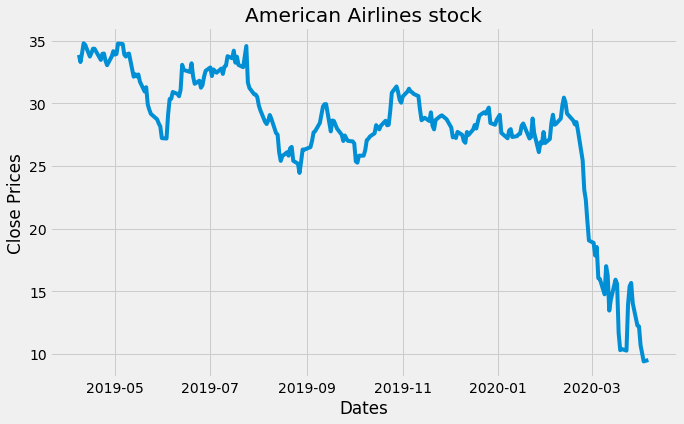

In [27]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(AAL_df['Close'])
plt.title('American Airlines stock')
plt.show()

המשבר שמטביע את תעשיית התעופה העולמית מחריף. 
אמריקן איירליינס הודיעו על ירידה צפויה בהכנסות, קיצוצים חדים בטיסותיהן ומהלכי חירום נוספים. זאת, במטרה לצמצם את נזקי נגיף הקורונה שמדלל באופן דרסטי את תנועתה נוסעים העולמית.
נכון ל־2019, אמריקן איירליינס היא חברת התעופה הגדולה בעולם עם צי של 956 מטוסים. 

### Cases & Deaths by country

    countriesAndTerritories  sum(cases)  sum(deaths)
0               Afghanistan         337            7
1                   Albania         377           22
2                   Andorra         526           21
3                   Algeria        1423          173
4                    Angola          16            2
..                      ...         ...          ...
199              Uzbekistan         397            2
200               Venezuela         159            5
201                 Vietnam         245            0
202                  Zambia          39            1
203                Zimbabwe           9            1

[204 rows x 3 columns]
countriesAndTerritories    object
sum(cases)                  int64
sum(deaths)                 int64
dtype: object
      countriesAndTerritories  sum(cases)  sum(deaths)
74                    Germany       99225         1607
97                     Israel        8904           57
98                      Italy      132547        16525
176 

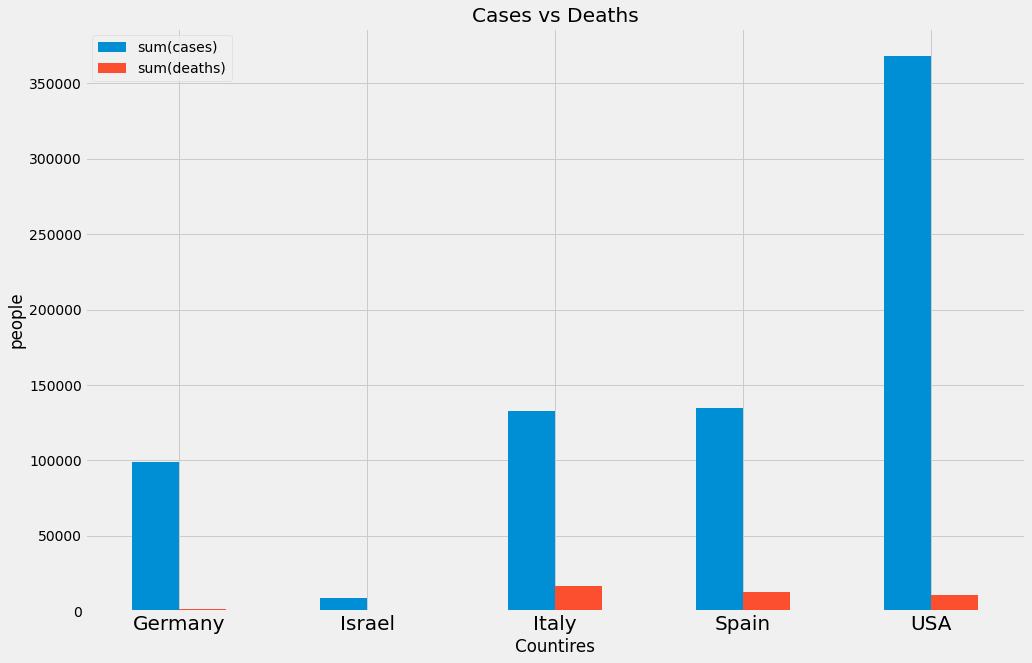

In [28]:

index = ('Germany', 'Israel', 'Italy', 'Spain', 'USA')

df2= pd.read_csv('coronaByCountry.csv')
print(df2)
print(df2.dtypes)
i= df2[df2['countriesAndTerritories'].str.contains("United_States_of_America") | df2['countriesAndTerritories'].str.contains("Italy") | df2['countriesAndTerritories'].str.contains("Israel") | df2['countriesAndTerritories'].str.contains("Spain") | df2['countriesAndTerritories'].str.contains("Germany")]
print(i)


ax = i[['sum(cases)','sum(deaths)']].plot(kind='bar', title ="Cases vs Deaths", figsize=(15, 10), legend=True, fontsize=14)
y_pos= np.arange(len(index))
ax.set_xlabel('Countires')
ax.set_ylabel('people')

ax.set_xticklabels(index, rotation=0, fontsize=20)
plt.show()


### WTI stock

In [29]:
df3= spark.read.csv('wti_daily_csv.csv', inferSchema=True,header=True)
df3= df3.filter(df3["Date"].contains("2020"))
df3.show()
#df3.write.option("header", "true").csv('wti_daily_2020.csv')

+----------+-----+
|      Date|Price|
+----------+-----+
|2020-01-02|61.17|
|2020-01-03| 63.0|
|2020-01-06|63.27|
|2020-01-07| 62.7|
|2020-01-08|59.65|
|2020-01-09|59.56|
|2020-01-10|59.02|
|2020-01-13|58.17|
|2020-01-14|58.34|
|2020-01-15|57.86|
|2020-01-16|58.52|
|2020-01-17|58.55|
|2020-01-21|58.25|
|2020-01-22|56.76|
|2020-01-23|55.51|
|2020-01-24|54.09|
|2020-01-27|53.09|
|2020-01-28|53.33|
|2020-01-29|53.29|
|2020-01-30|52.19|
+----------+-----+
only showing top 20 rows



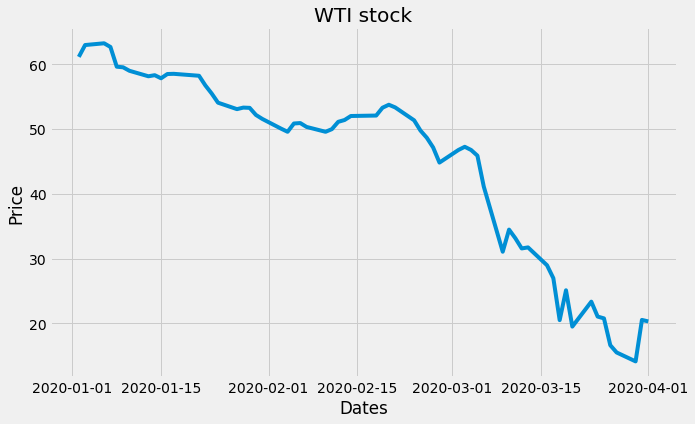

In [30]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
wti = pd.read_csv('wti_daily_2020.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Price')
plt.plot(wti['Price'])
plt.title('WTI stock')
plt.show()

### Compare changes WTI & AAL stock

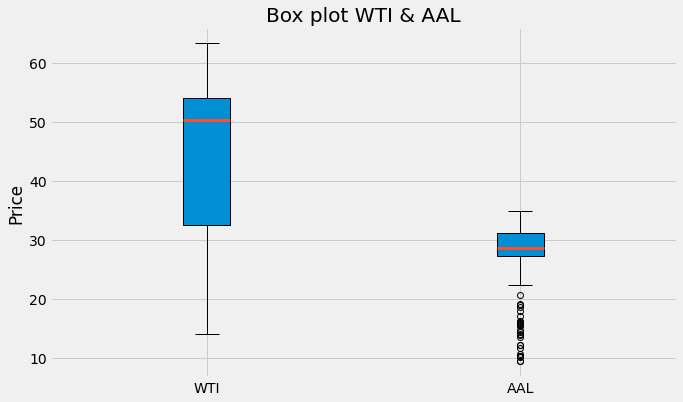

In [18]:
import matplotlib
matplotlib.axes.Axes.boxplot
matplotlib.pyplot.boxplot


data1 = [wti['Price'], AAL_df['Close']]
labels= ['WTI', 'AAL']
fig7, ax7 = plt.subplots()
ax7.set_title('Box plot WTI & AAL')
ax7.boxplot(data1, labels=labels, patch_artist=True,  medianprops={'linewidth':3})
plt.ylabel('Price')
plt.show()


##### עבור הנפט אני רואים שרוב הערכים נמצאים 30 ל55 כאשר הממוצע לאורך זמן הינו 50
##### כאשר יש נפילה דרמטית עד לערכים מינימליים של 15
##### עבור מחיר המנייה של חברת התעופה אנו רואים שהממוצע לאורך הזמן היה 30 ורוב הזמן זה נשאר כך
##### אך בעקבות משבר הקורונה נהיו ערכים מינימליים שרחוקים  מאוד מהטווח- הנקודות


In [32]:
# join dataframe by date

all1= spark.read.csv('AAL.csv', inferSchema=True,header=True)
all1.printSchema()
wti1= spark.read.csv('wti_daily_2020.csv', inferSchema=True,header=True)
wti1.printSchema()
inner_join = all1.join(wti1, ["Date"])

inner_join.show()

root
 |-- Date: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)

root
 |-- Date: string (nullable = true)
 |-- Price: double (nullable = true)

+----------+---------+---------+---------+---------+---------+--------+-----+
|      Date|     Open|     High|      Low|    Close|Adj Close|  Volume|Price|
+----------+---------+---------+---------+---------+---------+--------+-----+
|2020-01-02|    28.98|29.299999|    28.65|    29.09|28.982893| 6451100|61.17|
|2020-01-03|    28.27|28.290001|    27.34|    27.65|27.548195|14008900| 63.0|
|2020-01-06|27.190001|    27.49|    27.08|    27.32| 27.21941| 6105800|63.27|
|2020-01-07|27.559999|    27.68|27.059999|27.219999|27.119778| 6105900| 62.7|
|2020-01-08|     27.1|    28.09|    27.07|    27.84|27.737495|10496800|59.65|
|2020-01-09|    28.09|    28.23

In [33]:
# Save results

#inner_join.write.option("header", "true").csv('join_wti_AAL.csv')

Text(0, 0.5, 'ALL stock')

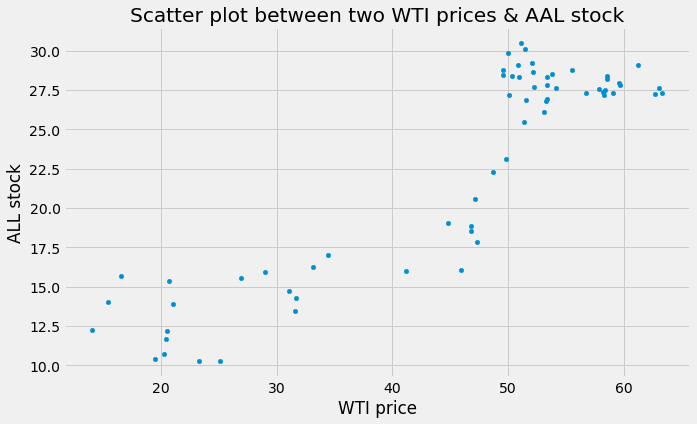

In [34]:
join_wti_AAL = pd.read_csv('join_wti_AAL.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

a =join_wti_AAL.plot.scatter(x='Price', y='Close', title= "Scatter plot between two WTI prices & AAL stock");
a.set_xlabel('WTI price')
a.set_ylabel('ALL stock')

#### בדיקה לגבי אופן השינוי של המחירים בעקבות משבר הקורונה
נראה שהייתה יציבות לפני שהקורונה החלה, הגוש הימיני העליון

עם הזמן בחודשים האחרונים יש קריסה כללית בביקוש לנפט- 
רוב הטיסות בעולם מושבתות ולכן גם אין רווח מנסיגת מחיר הנפט

In [38]:
from pyspark.sql.functions import corr

In [39]:
join_wti_AAL1= spark.read.csv('join_wti_AAL.csv', inferSchema=True,header=True)

join_wti_AAL1.select(corr('Price', 'Close')).show()

+------------------+
|corr(Price, Close)|
+------------------+
|0.9017850410477426|
+------------------+



 #### יש קורולוציה של 90% בין מחיר הנפט למניית אמריקן איירליינס

In [40]:
# join dataframe by date

inner_join1 = join_wti_AAL1.join(corona_daily, ["Date"])
inner_join1= inner_join1.orderBy('Date', ascending=False)
inner_join1.printSchema()
inner_join1.show()

root
 |-- Date: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Price: double (nullable = true)
 |-- sum(cases): long (nullable = true)
 |-- sum(deaths): long (nullable = true)

+----------+---------+---------+-----+---------+---------+---------+-----+----------+-----------+
|      Date|     Open|     High|  Low|    Close|Adj Close|   Volume|Price|sum(cases)|sum(deaths)|
+----------+---------+---------+-----+---------+---------+---------+-----+----------+-----------+
|2020-04-01|    11.45|    11.48| 10.5|    10.69|    10.69| 56854400|20.28|     73512|       4614|
|2020-03-31|     12.9|    12.96| 12.1|    12.19|    12.19| 44851400|20.51|     62443|       3697|
|2020-03-30|     13.2|    13.22|11.81|    12.25|    12.25| 50516800| 14.1|     58487|       3125|
|2020-03-27|    14.98|    15

### A negative correlation between WTI price to cases or deaths of Corona virus

In [41]:
inner_join1.select(corr('sum(cases)', 'Price')).show()

+-----------------------+
|corr(sum(cases), Price)|
+-----------------------+
|    -0.8124530272977009|
+-----------------------+



In [42]:
inner_join1.select(corr('sum(deaths)', 'Price')).show()

+------------------------+
|corr(sum(deaths), Price)|
+------------------------+
|     -0.7789574976004678|
+------------------------+



### Linear Regression
Runnig linear regression that shows prediction on oil prices by the data of cases and deaths of Corona virus and  American Airlines stock.

In [43]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [44]:
inner_join1.head(1)[0]

Row(Date='2020-04-01', Open=11.45, High=11.48, Low=10.5, Close=10.69, Adj Close=10.69, Volume=56854400, Price=20.28, sum(cases)=73512, sum(deaths)=4614)

In [45]:
assembler = VectorAssembler(inputCols=['Close','sum(cases)', 'sum(deaths)'],
                           outputCol='features')
output= assembler.transform(inner_join1)

In [46]:
# new column 'features' - Vector of the input values
output.head(1)

[Row(Date='2020-04-01', Open=11.45, High=11.48, Low=10.5, Close=10.69, Adj Close=10.69, Volume=56854400, Price=20.28, sum(cases)=73512, sum(deaths)=4614, features=DenseVector([10.69, 73512.0, 4614.0]))]

In [47]:
final_data = output.select('features', 'Price')
#final_data.show()

In [48]:
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [49]:
train_data.describe().show()

+-------+------------------+
|summary|             Price|
+-------+------------------+
|  count|                50|
|   mean| 47.14239999999998|
| stddev|13.031919300435415|
|    min|              16.6|
|    max|             63.27|
+-------+------------------+



In [50]:
test_data.describe().show()

+-------+------------------+
|summary|             Price|
+-------+------------------+
|  count|                13|
|   mean|36.456923076923076|
| stddev|16.455277970211352|
|    min|              14.1|
|    max|             58.52|
+-------+------------------+



In [51]:
lr= LinearRegression(labelCol= 'Price')

In [52]:
lr_model= lr.fit(train_data)

In [53]:
test_results = lr_model.evaluate(test_data)

In [54]:
test_results.residuals.show()

+-------------------+
|          residuals|
+-------------------+
|   7.00384346259494|
| 0.5867244027089544|
|   5.54409901716436|
|-5.4673917247534725|
|  4.156152899282162|
|-2.0660994882826174|
|  -6.12195546091305|
|-1.7772596751864569|
| 4.1633775152216685|
| -2.748830993820249|
|-2.8382739514720186|
|-2.2511711946862647|
|   2.15026411510096|
+-------------------+



In [55]:
test_results.rootMeanSquaredError

4.06527348210855

In [56]:
test_results.r2

0.933880251274509

This model explains 93 percent of the variance in the data

In [57]:
final_data.describe().show()

+-------+------------------+
|summary|             Price|
+-------+------------------+
|  count|                63|
|   mean|44.937460317460314|
| stddev|14.339810810855973|
|    min|              14.1|
|    max|             63.27|
+-------+------------------+



In [58]:
unlabled_data = test_data.select('features')

In [59]:
unlabled_data.show()

+--------------------+
|            features|
+--------------------+
|[10.69,73512.0,46...|
|[12.25,58487.0,31...|
|[14.04,59718.0,26...|
|[15.39,38927.0,22...|
|[10.25,33016.0,16...|
|[14.31,8355.0,351.0]|
|[16.26,4378.0,269.0]|
|[29.200001,4215.0...|
|[30.09,15151.0,25...|
|[28.299999,3751.0...|
| [27.16,2818.0,57.0]|
|[27.719999,1756.0...|
|     [28.23,0.0,0.0]|
+--------------------+



In [60]:
predictions = lr_model.transform(unlabled_data)

In [61]:
predictions.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[10.69,73512.0,46...|13.276156537405061|
|[12.25,58487.0,31...|13.513275597291045|
|[14.04,59718.0,26...|  9.93590098283564|
|[15.39,38927.0,22...|26.217391724753472|
|[10.25,33016.0,16...|19.173847100717836|
|[14.31,8355.0,351.0]|33.786099488282616|
|[16.26,4378.0,269.0]| 39.25195546091305|
|[29.200001,4215.0...| 53.80725967518646|
|[30.09,15151.0,25...| 47.24662248477833|
|[28.299999,3751.0...| 53.68883099382025|
| [27.16,2818.0,57.0]| 52.89827395147202|
|[27.719999,1756.0...| 54.44117119468626|
|     [28.23,0.0,0.0]| 56.36973588489904|
+--------------------+------------------+

